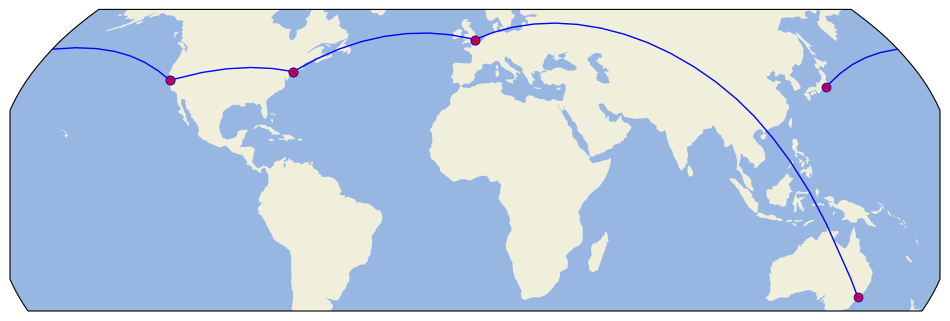

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

# 创建一个空的有向图
G = nx.DiGraph()

# 添加节点和边来构建网络
nodes = ['NYC', 'SF', 'Tokyo', 'London', 'Sydney']
edges = [('NYC', 'SF'), ('NYC', 'London'), ('Tokyo', 'SF'), ('London', 'Sydney')]

for node in nodes:
    G.add_node(node)

for edge in edges:
    G.add_edge(*edge)

# 使用Cartopy绘制世界地图
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

# 绘制陆地和海洋
ax.add_feature(cf.LAND)
ax.add_feature(cf.OCEAN)

# 获取节点的经纬度
node_positions = {
    'NYC': (-74.0060, 40.7128), # NYC
    'SF': (-122.4194, 37.7749), # SF
    'Tokyo': (139.6917, 35.6895), # Tokyo
    'London': (-0.1276, 51.5072), # London
    'Sydney': (151.2093, -33.8688) # Sydney
}

# 在地图上绘制网络
for edge in edges:
    lon_lats = [node_positions[node] for node in edge]
    lons, lats = zip(*lon_lats)
    ax.plot(lons, lats, color='blue', linewidth=1, marker='o', transform=ccrs.Geodetic())

# 绘制节点
for node, pos in node_positions.items():
    ax.plot(*pos, marker='o', color='red', markersize=5, alpha=0.7, transform=ccrs.Geodetic())

plt.show()

19


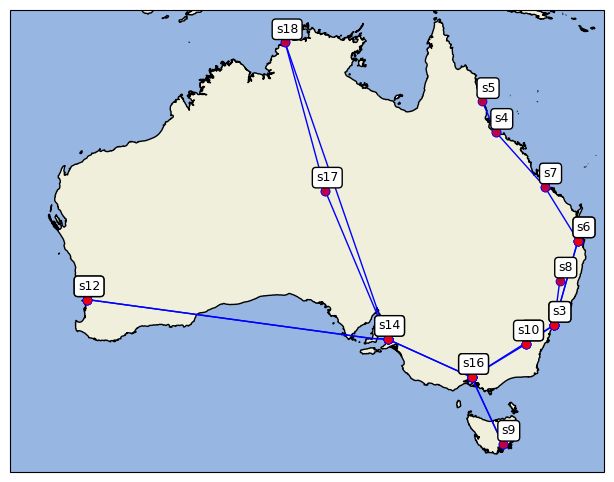

In [4]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

# JSON文件路径
json_file_path = '..\\topo_zone\process_topologies\\new_Aarnet.json'

# 读取JSON文件
with open(json_file_path, 'r') as f:
    topo_data = json.load(f)

# 提取节点信息
nodes_info = topo_data['nodes']

# 创建一个空的有向图
G = nx.DiGraph()

# 添加节点和边来构建网络
for node_id, info in nodes_info.items():
    G.add_node(node_id,id=info['id'],
               label=info['label'], 
               longitude=float(info['longitude']), 
               latitude=float(info['latitude']))

for link in topo_data['links']:
    from_node = link['from']
    to_node = link['to']
    G.add_edge(from_node, to_node)

# 使用Cartopy绘制澳大利亚地图
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# 设置地图的范围
ax.set_extent([110, 155, -45, -10], crs=ccrs.PlateCarree())

# 绘制陆地和海洋
ax.add_feature(cf.LAND)
ax.add_feature(cf.OCEAN)
ax.coastlines(resolution='10m')

# 获取所有节点的位置
node_positions = {node: (data['longitude'], data['latitude']) for node, data in G.nodes(data=True)}
print(len(node_positions.values()))
# 在地图上绘制网络
for edge in G.edges():
    lon_lats = [node_positions[node] for node in edge]
    lons, lats = zip(*lon_lats)
    ax.plot(lons, lats, color='blue', linewidth=1, marker='o', transform=ccrs.Geodetic())

# 绘制节点并加上标签
for node, pos in node_positions.items():
    ax.plot(*pos, marker='o', color='red', markersize=5, alpha=0.7, transform=ccrs.Geodetic())
    # 将标签放置在节点的右侧
    ax.text(pos[0]+1, pos[1]+1, G.nodes[node]['id'], fontsize=9, verticalalignment='center', horizontalalignment='right',
            transform=ccrs.Geodetic(), bbox=dict(facecolor='white', alpha=1, boxstyle='round,pad=0.3'))

plt.show()